In [35]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [36]:
df = pd.read_csv('bank.csv')
print(df.columns)
df.describe()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [37]:
dict = {
    'no': 0,
    'yes': 1
}
df['y'] = df['y'].map(dict)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [38]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['job']=label.fit_transform(df['job'])
df['marital']=label.fit_transform(df['marital'])
df['default']=label.fit_transform(df['default'])
df['housing']=label.fit_transform(df['housing'])
df['loan']=label.fit_transform(df['loan'])
df['contact']=label.fit_transform(df['contact'])
df['month']=label.fit_transform(df['month'])
df['day_of_week']=label.fit_transform(df['day_of_week'])
df['poutcome']=label.fit_transform(df['poutcome'])
df['education']=label.fit_transform(df['education'])

In [39]:
df=df.drop(columns=['contact','poutcome'])
df = df.dropna()

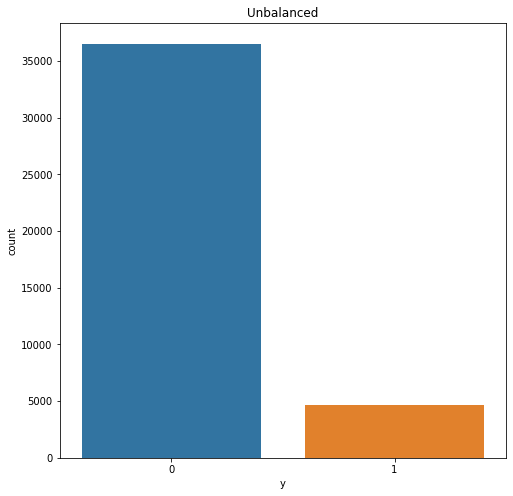

In [40]:
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.countplot('y', data=df)
plt.title('Unbalanced')
plt.show()

In [41]:
# Class count
count_class_0, count_class_1 = df['y'].value_counts()

# Divide by class
df_class_0 = df[df['y'] == 0]
df_class_1 = df[df['y'] == 1]

Random over-sampling:
1    36548
0    36548
Name: y, dtype: int64


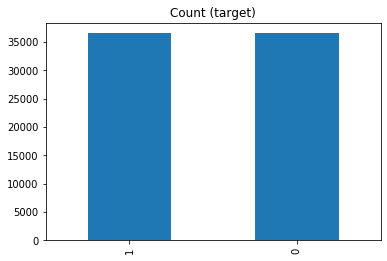

In [158]:
# #Under-sampling
# shuffled_df=df.sample(frac=1,random_state=4)
# yes_df=shuffled_df.loc[shuffled_df['y']== 1]
# no_df=shuffled_df.loc[shuffled_df['y']== 0].sample(n=4640,random_state=42)
# df_test_over=pd.concat([yes_df,no_df])
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over['y'].value_counts())

df_test_over['y'].value_counts().plot(kind='bar', title='Count (target)');

In [159]:
df_test_over

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,1,0,0,6,1,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,6,1,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,1,0,0,6,1,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,2,0,6,1,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,2,0,6,1,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [160]:
df_test_over[df_test_over.columns[1:]].corr()['y'][:]

job               0.039000
marital           0.070165
education         0.094017
default          -0.173233
housing           0.021795
loan             -0.009708
month            -0.011634
day_of_week       0.027770
duration          0.463412
campaign         -0.120674
pdays            -0.304177
previous          0.256756
emp.var.rate     -0.433196
cons.price.idx   -0.201365
cons.conf.idx     0.075385
euribor3m        -0.449197
nr.employed      -0.467651
y                 1.000000
Name: y, dtype: float64

In [161]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = df_test_over.loc[:, df_test_over.columns[1:]].values
# Separating out the target
y = df_test_over.loc[:,['y']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pd.DataFrame(data=x, columns = df_test_over.columns[1:]).head()
print(y)


[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [226]:
data_dt = df_test_over[['nr.employed','emp.var.rate','euribor3m','previous','education','default','age']] 
target_dt = df_test_over['y'] 

In [227]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_dt, target_dt, test_size=0.3, random_state = 42)

In [228]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['loan1', 'loan2'])
principalDf.head()

,loan1,loan2
0,-1.872227,0.464560
1,-2.188713,0.637244
2,-1.645642,0.185244
3,-1.867639,0.336220
4,-1.724104,0.528733


In [229]:
finalDf = np.concatenate([principalDf, df_test_over[['y']]], axis = 1)
finalDf

array([[-1.87222722,  0.46455985,  0.        ],
       [-2.18871313,  0.63724386,  0.        ],
       [-1.64564201,  0.18524439,  0.        ],
       ...,
       [-1.79517678,  0.42570547,  1.        ],
       [ 2.01386848,  1.93260656,  1.        ],
       [-1.49152417,  0.82792181,  1.        ]])

In [230]:
principalDf=pd.DataFrame(data=finalDf,columns=['loan1','loan2','y'])
principalDf.head(5)

,loan1,loan2,y
0,-1.872227,0.464560,0.0
1,-2.188713,0.637244,0.0
2,-1.645642,0.185244,0.0
3,-1.867639,0.336220,0.0
4,-1.724104,0.528733,0.0


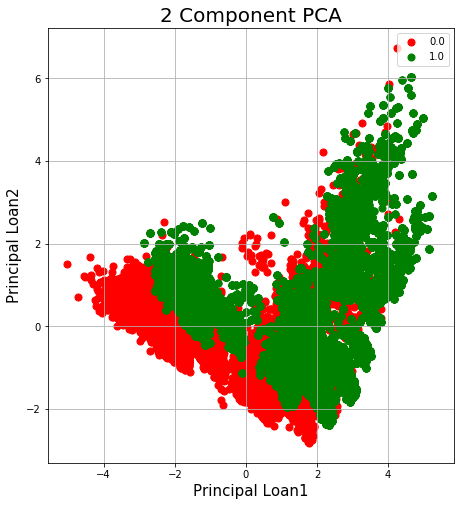

In [231]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1) 
ax1.set_xlabel('Principal Loan1', fontsize = 15)
ax1.set_ylabel('Principal Loan2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


targets = [0.0,1.0]
colors = 'rgb'
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['y'] == target
    ax1.scatter(principalDf.loc[indicesToKeep, 'loan1']
               , principalDf.loc[indicesToKeep, 'loan2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

In [232]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [233]:
y_pred = dt.predict(x_test)

In [234]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.864426102421451

In [235]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [236]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, data_dt, target_dt, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.87017784 0.87072503 0.87264022 0.87975376 0.87715458 0.88317373
 0.88220003 0.87070735 0.87057053 0.87768505]


In [237]:
round(np.mean(score)*100, 2)

87.55

In [239]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, data_dt, target_dt, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.87291382 0.86922025 0.8753762  0.87920657 0.87715458 0.88344733
 0.8780955  0.8734437  0.87152825 0.8780955 ]


In [240]:
round(np.mean(score)*100, 2)

87.58